In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [2]:
!pip install split-folders

In [3]:
import splitfolders

In [4]:
splitfolders.ratio("/kaggle/input/arslimgdataset-resized/ArSLimgDataset_resized", output='./new', 
                   seed=1337, ratio=(.8,.1,.1), group_prefix=None, move=False)

Copying files: 25439 files [01:30, 281.05 files/s]


In [5]:
TRAIN_DIR = '/kaggle/working/new/train'
VAL_DIR = '/kaggle/working/new/val'
TEST_DIR = '/kaggle/working/new/test'
CATEGORIES = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
              'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
              'y', 'z', 'zz', 'zzz']
ar_alphabet = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح','خ', 'د','ذ', 'ر', 'ز', 'س',
        'ش', 'ص','ض', 'ط', 'ظ','ع', 'غ', 'ف', 'ق','ك','ل', 'م','ن', 'ه', 'و','ي']
IMG_SIZE=200

In [6]:
batch_size = 200

In [7]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                           zoom_range=[1, 1.25], 
                                                           brightness_range=[0.4, 0.99],
                                                           fill_mode='nearest',
                                                           horizontal_flip=True,)
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_it = traingen.flow_from_directory(TRAIN_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE), batch_size=batch_size)
val_it = valgen.flow_from_directory(VAL_DIR, class_mode='categorical', target_size=(IMG_SIZE, IMG_SIZE),batch_size=batch_size)
test_it = testgen.flow_from_directory(TEST_DIR, class_mode='categorical',target_size=(IMG_SIZE, IMG_SIZE), batch_size=batch_size, shuffle=False)

Found 20336 images belonging to 28 classes.
Found 2533 images belonging to 28 classes.
Found 2570 images belonging to 28 classes.


In [8]:
print(len(train_it))

102


In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# model.add(Dense(128, activation='relu'))


model.add(Dense(28, activation='softmax'))

model.summary()

2023-02-06 16:32:17.460857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 16:32:17.553872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 16:32:17.554710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 16:32:17.557114: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 99, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0

In [12]:
model.compile(optimizer="adam", loss='categorical_crossentropy', 
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [13]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=val_it,
                    validation_steps=len(val_it), epochs=100, 
                    verbose=1, callbacks=[early_stop])

2023-02-06 16:32:23.181507: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-02-06 16:32:27.053067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


102/102 [==============================] - 237s 2s/step - loss: 3.4725 - accuracy: 0.0478 - precision: 0.0364 - recall: 9.8348e-05 - val_loss: 3.3047 - val_accuracy: 0.0616 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
102/102 [==============================] - 227s 2s/step - loss: 3.2055 - accuracy: 0.0940 - precision: 0.7179 - recall: 0.0028 - val_loss: 3.2441 - val_accuracy: 0.0640 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
102/102 [==============================] - 229s 2s/step - loss: 2.8644 - accuracy: 0.1789 - precision: 0.6234 - recall: 0.0189 - val_loss: 3.1245 - val_accuracy: 0.1113 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
102/102 [==============================] - 227s 2s/step - loss: 2.4679 - accuracy: 0.2703 - precision: 0.6497 - recall: 0.0595 - val_loss: 2.9408 - val_accuracy: 0.1275 - val_precision: 0.9167 - val_recall: 0.0043
Epoch 5/100
102/102 [==============================] - 227s 2s/step - loss: 2.11

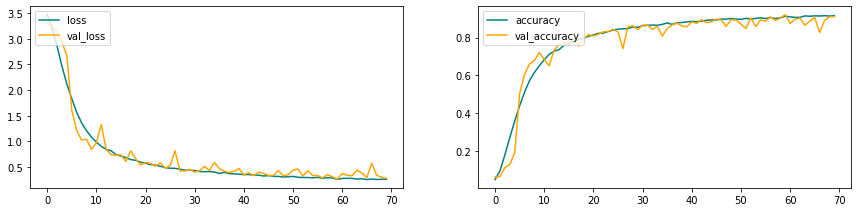

In [14]:
plt.figure(figsize=(400,400))

ax = plt.subplot(100,50,1)
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc="upper left")   

ax = plt.subplot(100,50,2)
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.legend(loc="upper left")

plt.show()

In [15]:
test_results = model.evaluate(test_it, steps=len(test_it), verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
print(f'Test results - Precision: {test_results[2]*100} - Recall: {test_results[3]*100}%')

13/13 [==============================] - 6s 483ms/step - loss: 0.2685 - accuracy: 0.9218 - precision: 0.9301 - recall: 0.9167
Test results - Loss: 0.2684745490550995 - Accuracy: 92.17898845672607%
Test results - Precision: 93.01223754882812 - Recall: 91.67315363883972%


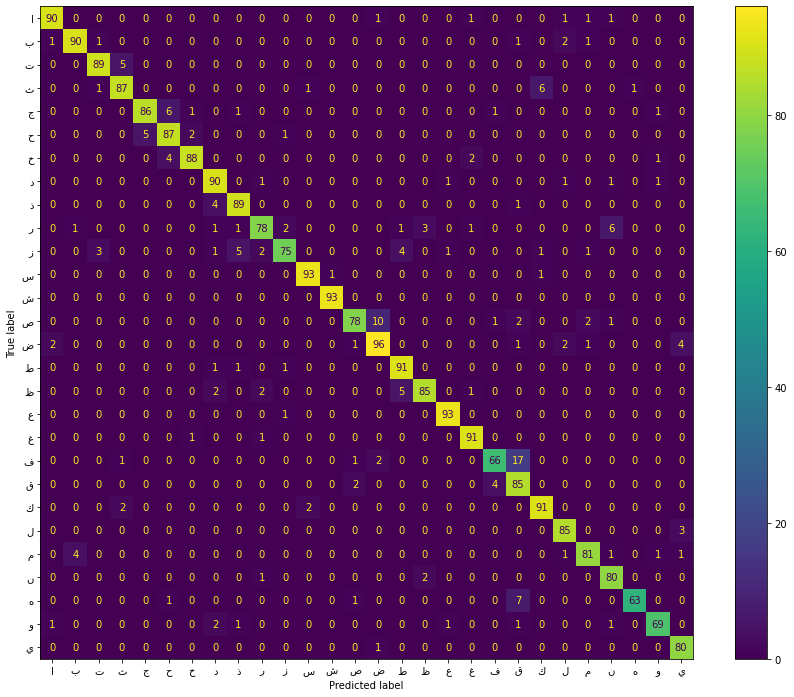

In [16]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_predictions = model.predict(test_it)
y_pred = np.argmax(y_predictions, axis=1)

cm=confusion_matrix(test_it.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ar_alphabet)

plt.rcParams["figure.figsize"] = 15, 12
disp.plot()
plt.show()

In [17]:
#Classification Report

from sklearn.metrics import classification_report

report = classification_report(test_it.classes,y_pred, target_names=ar_alphabet)
print(report)

              precision    recall  f1-score   support

           ا       0.96      0.95      0.95        95
           ب       0.95      0.94      0.94        96
           ت       0.95      0.95      0.95        94
           ث       0.92      0.91      0.91        96
           ج       0.95      0.90      0.92        96
           ح       0.89      0.92      0.90        95
           خ       0.96      0.93      0.94        95
           د       0.89      0.95      0.92        95
           ذ       0.91      0.95      0.93        94
           ر       0.92      0.83      0.87        94
           ز       0.94      0.81      0.87        93
           س       0.97      0.98      0.97        95
           ش       0.99      1.00      0.99        93
           ص       0.94      0.83      0.88        94
           ض       0.87      0.90      0.88       107
           ط       0.90      0.97      0.93        94
           ظ       0.94      0.89      0.92        95
           ع       0.97    

In [18]:
model_name = 'ArabicAlphabetSL'
model.save(f"{model_name}.h5")

# Test II

In [19]:
from tensorflow.keras.models import load_model
loaded_model = load_model(f'/kaggle/working/{model_name}.h5')

In [20]:
TEST2_DIR = "/kaggle/input/alphabetsarabicsignlanguage/AlphabetsArabicSignLanguage"
test2gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

test2_it = testgen.flow_from_directory(TEST2_DIR, class_mode='categorical',target_size=(IMG_SIZE, IMG_SIZE), batch_size=batch_size, shuffle=False)

Found 280 images belonging to 28 classes.


In [21]:
test2_results = loaded_model.evaluate(test2_it, verbose=1)
print(f'Test results - Loss: {test2_results[0]} - Accuracy: {test2_results[1]*100}%')
print(f'Test results - Precision: {test2_results[2]*100} - Recall: {test2_results[3]*100}%')

2/2 [==============================] - 41s 13s/step - loss: 1.0075 - accuracy: 0.7964 - precision: 0.8051 - recall: 0.7964
Test results - Loss: 1.0075236558914185 - Accuracy: 79.64285612106323%
Test results - Precision: 80.50541281700134 - Recall: 79.64285612106323%


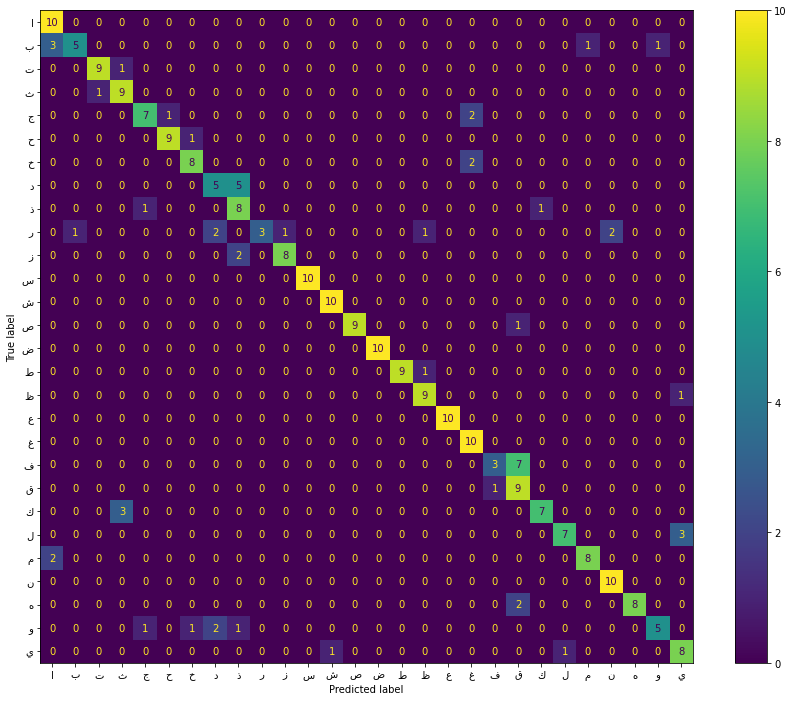

In [22]:
#Confusion Matrix

y_predictions2 = model.predict(test2_it)
y_pred2 = np.argmax(y_predictions2, axis=1)

cm=confusion_matrix(test2_it.classes, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ar_alphabet)

plt.rcParams["figure.figsize"] = 15, 12
disp.plot()
plt.show()

# TFLite

In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model

keras_model = load_model('/kaggle/working/ArabicAlphabetSL.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
with open(f'{model_name}.tflite', 'wb') as f:
    f.write(tflite_model)

2023-02-06 21:00:17.269237: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2023-02-06 21:00:18.786725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 21:00:18.787110: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-02-06 21:00:18.787225: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2023-02-06 21:00:18.787660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-06 21:00:18.788092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne